# Louisville Kentucky Restaurant Scores

## Summary:

This is a project for Code Louisville Data Analysis 1. The data being used comes from the Louisville Metro Open Data website. This data is being used to chart passing restaurant health department scores in the Louisville Kentucky Metro area.

Hypothesis: Scores in more wealthy parts of town will be higher than scores in less well off zip codes.

## Data Reading:

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
df_scores = pd.read_csv('Louisville_Metro_KY_-_Restaurant_Inspection_Scores.csv')
df_scores

,EstablishmentID,InspectionID,Ins_TypeDesc,EstablishmentName,PlaceName,Address,Address2,City,State,Zip,TypeDescription,InspectionDate,score,Grade,NameSearch,Intersection,OBJECTID
0,29956,1684470,REGULAR,CVS #6211,NaN,3721 LEXINGTON RD,NaN,LOUISVILLE,KY,40207,PRE-PACKAGED RETAIL,2022/07/06 00:00:00,100.0,NaN,CVS #6211,NaN,0
1,29967,1699737,REGULAR,NEIGHBORHOOD FOOD MART,NaN,542 LAMPTON ST,NaN,LOUISVILLE,KY,40203,SUPERMARKET WITH PROCESSING,2022/09/07 00:00:00,97.0,NaN,NEIGHBORHOOD FOOD MART,NaN,1
2,30043,1637804,REGULAR,F&Y SUPERMARKET,NaN,3801 W MARKET ST,NaN,LOUISVILLE,KY,40212,"RETAIL-FOOD 10,000 SQ FT OR LESS",2021/11/22 00:00:00,94.0,A,F&Y SUPERMARKET,NaN,2
3,30043,1637805,REGULAR,F&Y SUPERMARKET,NaN,3801 W MARKET ST,NaN,LOUISVILLE,KY,40212,"RETAIL-FOOD 10,000 SQ FT OR LESS",2021/11/22 00:00:00,95.0,NaN,F&Y SUPERMARKET,NaN,3
4,30043,1700824,FOLLOWUP,F&Y SUPERMARKET,NaN,3801 W MARKET ST,NaN,LOUISVILLE,KY,40212,"RETAIL-FOOD 10,000 SQ FT OR LESS",2022/09/12 00:00:00,98.0,NaN,F&Y SUPERMARKET,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,116688,1707224,OTHER,PAPA MURPHY'S,NaN,12535 SHELBYVILLE RD,NaN,LOUISVILLE,KY,40243,FOOD SERVICE,2022/09/07 00:00:00,99.0,NaN,PAPA MURPHY'S,NaN,7000
7001,116689,1707232,OTHER,VALHALLA GOLF CLUB,NaN,15503 SHELBYVILLE RD,NaN,LOUISVILLE,KY,40245,FOOD SERVICE,2022/09/08 00:00:00,100.0,NaN,VALHALLA GOLF CLUB,NaN,7001
7002,116690,1707246,OTHER,VINAIGRETTE SALAD KITCHEN,NaN,4037 SUMMIT PLAZA DR,NaN,LOUISVILLE,KY,40241,FOOD SERVICE,2022/09/09 00:00:00,99.0,NaN,VINAIGRETTE SALAD KITCHEN,NaN,7002
7003,116693,1707248,OTHER,SUBWAY,NaN,231 E CHESTNUT ST,NaN,LOUISVILLE,KY,40202,FOOD SERVICE,2022/09/13 00:00:00,100.0,NaN,SUBWAY,NaN,7003


## Data Cleaning:

Cleaning data by deleting specific empty columns:

In [83]:
df = df_scores.drop(['PlaceName', 'Address2', 'Intersection'], axis='columns')
df

,EstablishmentID,InspectionID,Ins_TypeDesc,EstablishmentName,Address,City,State,Zip,TypeDescription,InspectionDate,score,Grade,NameSearch,OBJECTID
0,29956,1684470,REGULAR,CVS #6211,3721 LEXINGTON RD,LOUISVILLE,KY,40207,PRE-PACKAGED RETAIL,2022/07/06 00:00:00,100.0,NaN,CVS #6211,0
1,29967,1699737,REGULAR,NEIGHBORHOOD FOOD MART,542 LAMPTON ST,LOUISVILLE,KY,40203,SUPERMARKET WITH PROCESSING,2022/09/07 00:00:00,97.0,NaN,NEIGHBORHOOD FOOD MART,1
2,30043,1637804,REGULAR,F&Y SUPERMARKET,3801 W MARKET ST,LOUISVILLE,KY,40212,"RETAIL-FOOD 10,000 SQ FT OR LESS",2021/11/22 00:00:00,94.0,A,F&Y SUPERMARKET,2
3,30043,1637805,REGULAR,F&Y SUPERMARKET,3801 W MARKET ST,LOUISVILLE,KY,40212,"RETAIL-FOOD 10,000 SQ FT OR LESS",2021/11/22 00:00:00,95.0,NaN,F&Y SUPERMARKET,3
4,30043,1700824,FOLLOWUP,F&Y SUPERMARKET,3801 W MARKET ST,LOUISVILLE,KY,40212,"RETAIL-FOOD 10,000 SQ FT OR LESS",2022/09/12 00:00:00,98.0,NaN,F&Y SUPERMARKET,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,116688,1707224,OTHER,PAPA MURPHY'S,12535 SHELBYVILLE RD,LOUISVILLE,KY,40243,FOOD SERVICE,2022/09/07 00:00:00,99.0,NaN,PAPA MURPHY'S,7000
7001,116689,1707232,OTHER,VALHALLA GOLF CLUB,15503 SHELBYVILLE RD,LOUISVILLE,KY,40245,FOOD SERVICE,2022/09/08 00:00:00,100.0,NaN,VALHALLA GOLF CLUB,7001
7002,116690,1707246,OTHER,VINAIGRETTE SALAD KITCHEN,4037 SUMMIT PLAZA DR,LOUISVILLE,KY,40241,FOOD SERVICE,2022/09/09 00:00:00,99.0,NaN,VINAIGRETTE SALAD KITCHEN,7002
7003,116693,1707248,OTHER,SUBWAY,231 E CHESTNUT ST,LOUISVILLE,KY,40202,FOOD SERVICE,2022/09/13 00:00:00,100.0,NaN,SUBWAY,7003


In [84]:
#also want to make score in header show as Score

## Data Manipulation:

Average passing restaurant score of all inspection types:

In [85]:
avg_score_df = df['score'].mean()
print(avg_score_df)

97.71599873777217


Lowest 10 passing scores:

In [86]:
df.nsmallest(10, ['score'])

,EstablishmentID,InspectionID,Ins_TypeDesc,EstablishmentName,Address,City,State,Zip,TypeDescription,InspectionDate,score,Grade,NameSearch,OBJECTID
3818,100533,1639075,REGULAR,EL NOPAL,962 BAXTER AVE,LOUISVILLE,KY,40204,FOOD SERVICE,2021/11/30 00:00:00,70.0,C,EL NOPAL,3818
686,34687,1655300,REGULAR,SOUTH PARK COUNTRY CLUB,915 S PARK RD,LOUISVILLE,KY,40118,FOOD SERVICE,2022/03/01 00:00:00,73.0,C,SOUTH PARK COUNTRY CLUB,686
1599,67343,1648889,REGULAR,AUGUST MOON,2269 LEXINGTON RD,LOUISVILLE,KY,40206,FOOD SERVICE,2022/01/27 00:00:00,73.0,C,AUGUST MOON,1599
3787,100280,1632435,REGULAR,TIME FOR THAI,2206 FRANKFORT AVE,LOUISVILLE,KY,40206,FOOD SERVICE,2021/10/26 00:00:00,75.0,C,TIME FOR THAI,3787
5648,111723,1637801,REGULAR,BANAADIR RESTAURANT,5600 S 3RD ST,LOUISVILLE,KY,40214,FOOD SERVICE,2021/11/22 00:00:00,76.0,C,BANAADIR RESTAURANT,5648
5912,112909,1703857,REGULAR,TAQUERIA LOS GORDITOS,2017 BROWNSBORO RD STE B,LOUISVILLE,KY,40206,FOOD SERVICE,2022/09/26 00:00:00,76.0,C,TAQUERIA LOS GORDITOS,5912
3490,97563,1660756,REGULAR,GUANAQUITA RESTAURANT,4231 TAYLOR BLVD,LOUISVILLE,KY,40215,FOOD SERVICE,2022/03/24 00:00:00,77.0,C,GUANAQUITA RESTAURANT,3490
4772,106862,1693288,REGULAR,TOWNEPLACE SUITES,6601 PARAMOUNT PARK DR,LOUISVILLE,KY,40213,FOOD SERVICE,2022/08/10 00:00:00,77.0,C,TOWNEPLACE SUITES,4772
6181,114056,1645680,REGULAR,LIMA'S BAKERY,5600 NATIONAL TURNPIKE STE 2,LOUISVILLE,KY,40214,FOOD SERVICE,2022/01/10 00:00:00,77.0,C,LIMA'S BAKERY,6181
6507,114799,1662171,REGULAR,CHICAGO'S JERK TACOS,227 S 30TH ST,LOUISVILLE,KY,40212,FOOD SERVICE,2022/03/30 00:00:00,77.0,C,CHICAGO'S JERK TACOS,6507


Highest 10 passing scores:

In [87]:
df.nlargest(10, ['score'])

,EstablishmentID,InspectionID,Ins_TypeDesc,EstablishmentName,Address,City,State,Zip,TypeDescription,InspectionDate,score,Grade,NameSearch,OBJECTID
0,29956,1684470,REGULAR,CVS #6211,3721 LEXINGTON RD,LOUISVILLE,KY,40207,PRE-PACKAGED RETAIL,2022/07/06 00:00:00,100.0,NaN,CVS #6211,0
16,30154,1660530,REGULAR,CIRCLE K #4700117,9619 WHIPPS MILL RD,LOUISVILLE,KY,40222,PRE-PACKAGED RETAIL,2022/03/23 00:00:00,100.0,NaN,CIRCLE K #4700117,16
18,30162,1642845,REGULAR,CORNER MARKET,358 N 26TH ST,LOUISVILLE,KY,40212,"RETAIL-FOOD 10,000 SQ FT OR LESS",2021/12/16 00:00:00,100.0,NaN,CORNER MARKET,18
28,30394,1684121,FOLLOWUP,SAM'S CLUB #8276,6622 PRESTON HWY,LOUISVILLE,KY,40219,"RETAIL-FOOD 10,000 SQ FT OR LESS",2022/07/05 00:00:00,100.0,NaN,SAM'S CLUB #8276,28
29,30411,1641759,REGULAR,WALGREENS #12322,808 EASTERN PKWY,LOUISVILLE,KY,40217,PRE-PACKAGED RETAIL,2021/12/13 00:00:00,100.0,NaN,WALGREENS #12322,29
30,30425,1685452,REGULAR,BIG LOTS #226,4121 SHELBYVILLE RD,LOUISVILLE,KY,40207,SUPERMARKET WITH PROCESSING,2022/07/11 00:00:00,100.0,NaN,BIG LOTS #226,30
31,30917,1642460,REGULAR,BRIGHT HORIZONS @ PLAINVIEW SCHOOL,10320 TIMBERWOOD CIRCLE,LOUISVILLE,KY,40223,FOOD SERVICE (DAY CARE / CHILD CARE CENTER,2021/12/14 00:00:00,100.0,A,BRIGHT HORIZONS @ PLAINVIEW SCHOOL,31
33,30972,1654739,REGULAR,KINDER CARE LEARNING CTR #420,730 ZORN AVE,LOUISVILLE,KY,40206,FOOD SERVICE (DAY CARE / CHILD CARE CENTER,2022/02/25 00:00:00,100.0,A,KINDER CARE LEARNING CTR #420,33
34,30972,1701548,REGULAR,KINDER CARE LEARNING CTR #420,730 ZORN AVE,LOUISVILLE,KY,40206,FOOD SERVICE (DAY CARE / CHILD CARE CENTER,2022/09/14 00:00:00,100.0,A,KINDER CARE LEARNING CTR #420,34
38,30993,1703319,REGULAR,WEE CARE NURSERY,11616 MAIN ST,LOUISVILLE,KY,40243,FOOD SERVICE (DAY CARE / CHILD CARE CENTER,2022/09/21 00:00:00,100.0,A,WEE CARE NURSERY,38


How many inspections were done in each zip code:

In [88]:
df['Zip'].value_counts()

40202    644
40219    486
40207    462
40206    397
40214    395
40222    386
40241    338
40209    323
40213    308
40299    279
40203    267
40272    237
40212    211
40223    209
40243    201
40291    199
40204    183
40229    160
40258    159
40217    155
40245    141
40211    140
40228    117
40216    116
40059    110
40218     69
40118     64
40215     58
40205     54
40210     47
40242     35
40220     31
40208      9
40041      9
40177      2
40023      2
40225      2
Name: Zip, dtype: int64

Average score of each type of inspection:

In [89]:
df.dropna(axis=0, subset='score', inplace=True)
df_average = df[['score', 'Ins_TypeDesc']]
df_average.groupby('Ins_TypeDesc').mean()

,score
Ins_TypeDesc,
COMPLAINT,90.750000
FOLLOWUP,98.472492
OTHER,98.316418
REGULAR,97.646043
SURVEY,97.117647


## Data Visualization:

Visualization of average of each type of inspection:

(90.0, 100.0)

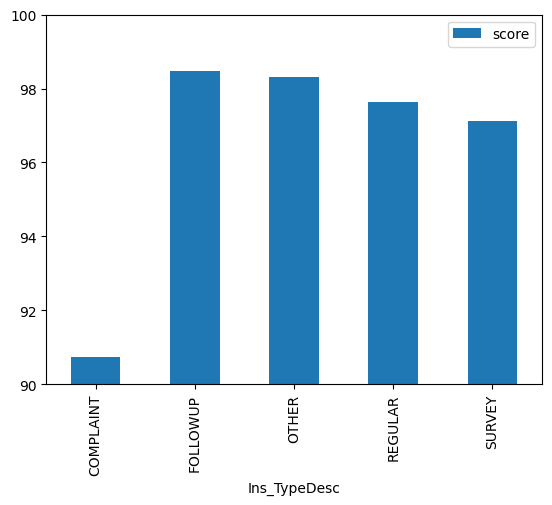

In [92]:
graph = df_average.groupby('Ins_TypeDesc').mean()
ax1 = graph.plot(kind='bar')
ax1.set_ylim(90, 100)




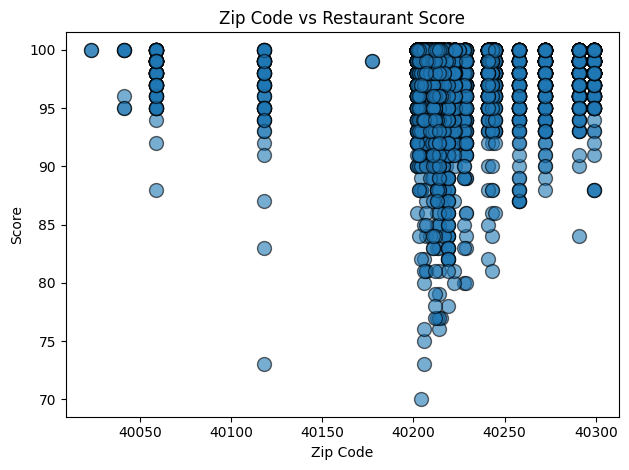

In [91]:
data = pd.read_csv('Louisville_Metro_KY_-_Restaurant_Inspection_Scores.csv')
zip_code = data['Zip']
score = data['score']

plt.scatter(zip_code, score, s=100, alpha=0.6, edgecolor='black', linewidth=1)

plt.title('Zip Code vs Restaurant Score')
plt.xlabel('Zip Code')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

## Analysis:

My findings show that the most inspections done are regular inspections. Restaurants in the ____ zip codes vary in their scores vs some other zip codes like ____.